##I.Importing Packages and Modules

In [451]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

##II.Mounting the Drive

In [452]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##III. Reading the Dataset

In [453]:
census = pd.read_csv("/content/drive/MyDrive/MSBA_Colab_2020/ML_Algorithms/CA04/Data/census_data.csv")
census

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


##IV. Data Inspection and Quality Analysis

In [454]:
# Descriptive Statistics
census.describe()

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [455]:
#First Few Rows
census.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [456]:
#Count of Rows
census.count()

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

In [457]:
# Data type
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [458]:
# Check for duplicate records:
census.duplicated().sum()

40012

In [459]:
#Cheking for Null Values
pd.isnull(census).sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

##V. Data Processing
Splitting

In [460]:
#Hours Per Week 
hpw = census["hours_per_week_bin"].str.split(". ", n = 1, expand = True)
census["Hours Per Week"]=hpw[1]

#Occupation
occupation =census["occupation_bin"].str.split(". ",n=1, expand =True)
census["Occupation"]=occupation[1]

#Marital Status
msr = census["msr_bin"].str.split(". ",n=1, expand=True)
census["Marital Status"]=msr[1]

#Gapital Gain/Loss
capgl = census["capital_gl_bin"].str.split(". ",n=1, expand=True)
census["Capital Gain/Loss"]=capgl[1]

#Race and Sex
race_sex = census["race_sex_bin"].str.split(". ",n=1, expand=True)
census["Race Sex"]=race_sex[1]

#Education
education = census["education_bin"].str.split(". ",n=1, expand=True)
census["Education"]=education[1]

#Age
age = census["age_bin"].str.split(". ",n=1, expand=True)
census["Age"]=age[1]

Post Processing (DataFrame Head)

In [461]:
census.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y,Hours Per Week,Occupation,Marital Status,Capital Gain/Loss,Race Sex,Education,Age
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0,31-40,Mid - Low,Mid,> 0,High,Bachelors,36-40 & 56-60
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0,0-30,High,High,= 0,High,Bachelors,40-55
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0,31-40,Low,Mid,= 0,High,Mid,36-40 & 56-60
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0,31-40,Low,High,= 0,Mid,Low,40-55
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0,31-40,High,High,= 0,Low,Bachelors,26-30 & 71-100


Removing Columns (DataFrame Head)

In [462]:
census = census.drop(['hours_per_week_bin','occupation_bin','msr_bin','capital_gl_bin','education_bin','age_bin','race_sex_bin','workclass_bin','education_num_bin'], axis=1)
census.head()

,flag,y,Hours Per Week,Occupation,Marital Status,Capital Gain/Loss,Race Sex,Education,Age
0,train,0,31-40,Mid - Low,Mid,> 0,High,Bachelors,36-40 & 56-60
1,train,0,0-30,High,High,= 0,High,Bachelors,40-55
2,train,0,31-40,Low,Mid,= 0,High,Mid,36-40 & 56-60
3,train,0,31-40,Low,High,= 0,Mid,Low,40-55
4,train,0,31-40,High,High,= 0,Low,Bachelors,26-30 & 71-100


##VI. Generating Dummy Variables

In [463]:

census = pd.get_dummies(census, columns=["Hours Per Week", "Occupation", "Marital Status", "Capital Gain/Loss", "Race Sex", "Education", "Age"],drop_first=True)

In [464]:
census.head()

,flag,y,Hours Per Week_31-40,Hours Per Week_41-50 & 61-70,Hours Per Week_51-60,Hours Per Week_71-100,Occupation_Low,Occupation_Mid - High,Occupation_Mid - Low,Occupation_Mid - Mid,Marital Status_Low,Marital Status_Mid,Capital Gain/Loss_= 0,Capital Gain/Loss_> 0,Race Sex_Low,Race Sex_Mid,Education_High,Education_Low,Education_Masters,Education_Mid,Age_26-30 & 71-100,Age_31-35 & 61-70,Age_36-40 & 56-60,Age_40-55
0,train,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
1,train,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,train,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0
3,train,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
4,train,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0


##VII. Renaming Columns for XGBOOST Model

In [465]:
census.columns = census.columns.str.replace(">","Greater")
census.columns = census.columns.str.replace("<","Less")
census.columns = census.columns.str.replace("&","And")

## VIII. Splitting Dataset into Train and Test

Train Dataset

In [466]:
#Rows where flag is train
train_census = census.loc[census["flag"]=="train"]
trainx = train_census.drop(["y","flag"], axis=1)

trainx.head()
trainy = train_census["y"]

Test Dataset

In [467]:
#Rows where flag is test
test_census = census.loc[census["flag"]=="test"]
testx = test_census.drop(["y","flag"], axis=1)

testx.head()
testy = test_census["y"]

Columns Except Outcome Column

In [468]:
census1 = census.drop(["y","flag"], axis=1)

 Creating Income Column

In [469]:
income_census = census["y"]

Income Greater than $50,000

In [470]:
print("Income Greater Than $50,000: (%d/%d) Or %.2f%%" % (np.sum(income_census), len(income_census), 100*float(np.sum(income_census)) / len(income_census)))

Income Greater Than $50,000: (11687/48842) Or 23.93%


##IX. Optimal Value of a Key Hyper-Parameter

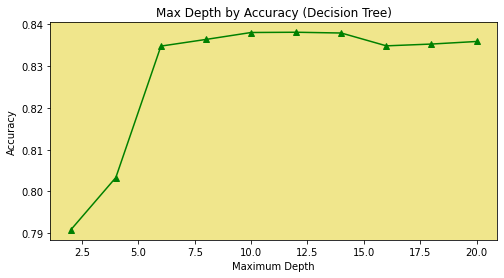

In [471]:
output = []
max_depth = [2,4,6,8,10,12,14,16,18,20]
for m in max_depth:
  model = DecisionTreeClassifier(max_depth=m, random_state=101)
  model.fit(trainx, trainy)
  ypredicted = model.predict(testx)
  accuracy = np.mean(testy == ypredicted)
  output.append(accuracy)
plt.figure(figsize=(8,4))
plt.ylabel("Accuracy")
plt.xlabel("Maximum Depth")
plt.title("Max Depth by Accuracy (Decision Tree)")
pd.Series(output, max_depth_options).plot(marker = "^", color="green")
ax = plt.gca()
ax.set_facecolor("khaki")
plt.show()

##X. Random Forest Model 

Listing N_Estimator Hyper-Parameter Options

Text(0.5, 0, 'N_Estimator Hyper-Parameter Options')

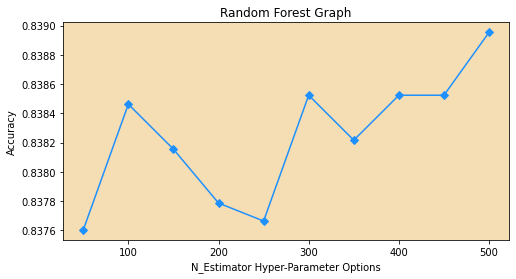

In [472]:
output = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]
for n in n_estimator:
  model=RandomForestClassifier(n_estimators=n,max_features='auto', random_state=101)
  model.fit(trainx, trainy)
  ypredicted = model.predict(testx)
  accuracy = np.mean(testy == ypredicted)
  output.append(accuracy)
#(Random Forest Model With Various N_Estimator Hyper-Parameter Options)
plt.figure(figsize=(8,4))
pd.Series(output,n_estimator).plot(marker="D",color="dodgerblue")
ax = plt.gca()
ax.set_facecolor("wheat")
plt.title("Random Forest Graph")
plt.ylabel("Accuracy")
plt.xlabel("N_Estimator Hyper-Parameter Options")

##XI. Ada Boost Model

Text(0.5, 0, 'N_Estimator Hyper-Parameter Options')

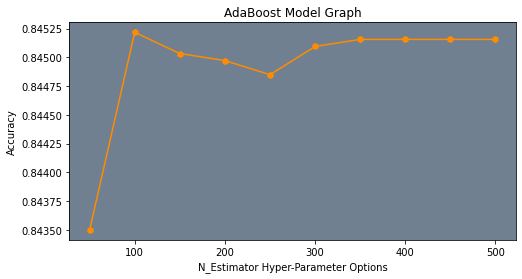

In [473]:
output = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]
for n in n_estimator:
  model_ada=AdaBoostClassifier(n_estimators=n, random_state=101)
  model_ada.fit(trainx, trainy)
  ypredicted = model_ada.predict(testx)
  accuracy = np.mean(testy == ypredicted)
  output.append(accuracy)
#(AdaBoost Model With Various N_Estimator Hyper-Parameter Options)
plt.figure(figsize=(8,4))
pd.Series(output,n_estimator).plot(marker="h",color="darkorange")
ax = plt.gca()
ax.set_facecolor("slategrey")
plt.title("AdaBoost Model Graph")
plt.ylabel("Accuracy")
plt.xlabel("N_Estimator Hyper-Parameter Options")

##XII. Gradient Boost Model

Text(0.5, 0, 'N_Estimator Hyper-Parameter Options')

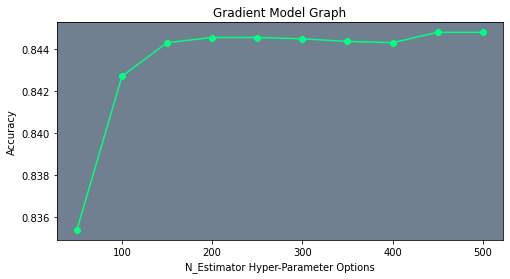

In [474]:
output = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]
for n in n_estimator:
  model_gradient = GradientBoostingClassifier(n_estimators=n,learning_rate=0.1,max_depth=2,random_state=0)
  model_gradient.fit(trainx, trainy)
  ypredicted = model_gradient.predict(testx)
  accuracy = np.mean(testy == ypredicted)
  output.append(accuracy)
#(Gradient Boost Model With Various N_Estimator Hyper-Parameter Options)
plt.figure(figsize=(8,4))
pd.Series(output,n_estimator).plot(marker="8",color="springgreen")
ax = plt.gca()
ax.set_facecolor("slategrey")
plt.title("Gradient Model Graph")
plt.ylabel("Accuracy")
plt.xlabel("N_Estimator Hyper-Parameter Options")

##XIII. XG Boost Model

Text(0.5, 0, 'N_Estimator Hyper-Parameter Options')

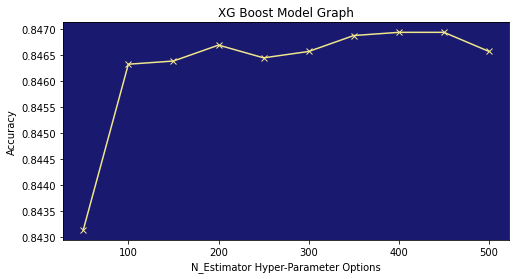

In [475]:
output = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]
for n in n_estimator:
  model_xgboost = XGBClassifier(n_estimators = n, random_state = 101)
  model_xgboost.fit(trainx, trainy)
  ypredicted = model_xgboost.predict(testx)
  accuracy = np.mean(testy == ypredicted)
  output.append(accuracy)
#(XG Boost Model With Various N_Estimator Hyper-Parameter Options)
plt.figure(figsize=(8,4))
pd.Series(output,n_estimator).plot(marker="x",color="khaki")
ax = plt.gca()
ax.set_facecolor("midnightblue")
plt.title("XG Boost Model Graph")
plt.ylabel("Accuracy")
plt.xlabel("N_Estimator Hyper-Parameter Options")

##XIV. Comparing Performance Across 

Parameter of N_estimator, Random_state Constant Across Models

a. Random Forest Model

In [476]:
Random_state=101
n = 500 
random_forest_model = RandomForestClassifier(n_estimators=n,max_features='auto', random_state=Random_state)
random_forest_model.fit(trainx,trainy)
predictedy = random_forest_model.predict(testx)
random_forest_auc = roc_auc_score(testy,predictedy)
random_forest_accuracy = np.mean(testy==predictedy)

b. Ada Boost Model

In [477]:
ada_boost_model = AdaBoostClassifier(n_estimators=n,random_state=Random_state)
ada_boost_model.fit(trainx, trainy)
predictedy = ada_boost_model.predict(testx)
ada_boost_auc = roc_auc_score(testy,predictedy)
ada_boost_accuracy = np.mean(testy==predictedy)

c. Gradient Boost Model

In [478]:
gradient_boost_model=GradientBoostingClassifier(n_estimators=n,learning_rate=0.1,max_depth=2,random_state=0)
gradient_boost_model.fit(trainx, trainy)
predictedy = gradient_boost_model.predict(testx)
gradient_boost_auc = roc_auc_score(testy,predictedy)
gradient_boost_accuracy = np.mean(testy == predictedy)

d. XG Boost Model

In [479]:
xgboost_model = XGBClassifier(n_estimators=n, random_state=Random_state)
xgboost_model.fit(trainx, trainy)
y_pred = xgboost_model.predict(testx)
xgboost_auc = roc_auc_score(testy, predictedy)
xgboost_accuracy = np.mean(testy == predictedy)

##XV. Displaying Reults/Output in DataFrame

In [480]:
Moldel_Comparisons = pd.DataFrame({"Random Forest Model": [random_forest_auc, random_forest_accuracy, n, Random_state],
                             "Ada Boost Model": [ada_boost_auc, ada_boost_accuracy, n, Random_state], 
                             "Gradient Boost Model": [gradient_boost_auc, gradient_boost_accuracy, n, Random_state],
                             "XG Boost Model": [xgboost_auc, xgboost_accuracy, n, Random_state]}
                            ,index=["AUC","Accuracy","N Estimator","Random State"])
Moldel_Comparisons.round(3)

,Random Forest Model,Ada Boost Model,Gradient Boost Model,XG Boost Model
AUC,0.747,0.747,0.751,0.751
Accuracy,0.839,0.845,0.845,0.845
N Estimator,500.000,500.000,500.000,500.000
Random State,101.000,101.000,101.000,101.000
